In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    x = x0 + 2 * eps
    
    while True:
        
        x = x0 - f(x0) / fder(x0)
        niter += 1
        
        if abs(x - x0) <= eps or niter == maxiter:
            break
            
        x0 = x
    
    return x, niter

In [14]:
f = lambda z: z**3 - 1

fder = lambda z: 3 * z**2

import cmath

points = 2000
eps = 1e-5

x_range = np.linspace(-2, 2, points)
y_range = np.linspace(-1, 1, points)

fractal = np.zeros(shape=(points, points))

for i in range(points):
    for j in range(points):
        x = x_range[i]
        y = y_range[j]
        z = complex(x,y)
        root, iteration = newton_iteration(f, fder, z, eps=1e-5, maxiter=1000)
        if abs(root - cmath.exp(2j*cmath.pi*0/3)) <= eps:
            fractal[i, j] = 1
        if abs(root - cmath.exp(2j*cmath.pi*1/3)) <= eps:
            fractal[i, j] = 2
        if abs(root - cmath.exp(2j*cmath.pi*2/3)) <= eps:
            fractal[i, j] = 3

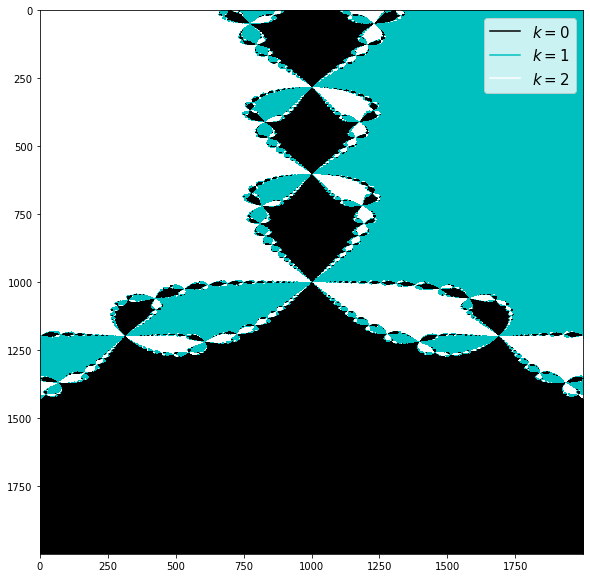

In [33]:
from matplotlib import colors

cmap = colors.ListedColormap(['black', 'c', 'white'])
bounds = [0, 1, 2, 3]

plt.figure(figsize=[10, 10])

plt.plot(0, 0, color='black', label=r'$k=0$')
plt.plot(0, 0, color='c', label=r'$k=1$')
plt.plot(0, 0, color='white', label=r'$k=2$')

plt.legend(prop={'size': 15})
plt.imshow(fractal, cmap=cmap)
plt.show()